In [ ]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv("/content/enhanced_box_office_data(2000-2024)u.csv")

# Display dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  5000 non-null   int64  
 1   Release Group         5000 non-null   object 
 2   $Worldwide            5000 non-null   float64
 3   $Domestic             5000 non-null   float64
 4   Domestic %            5000 non-null   float64
 5   $Foreign              5000 non-null   float64
 6   Foreign %             5000 non-null   float64
 7   Year                  5000 non-null   int64  
 8   Genres                4822 non-null   object 
 9   Rating                4830 non-null   object 
 10  Vote_Count            4830 non-null   float64
 11  Original_Language     4830 non-null   object 
 12  Production_Countries  4800 non-null   object 
dtypes: float64(6), int64(2), object(5)
memory usage: 507.9+ KB


,Rank,Release Group,$Worldwide,$Domestic,Domestic %,$Foreign,Foreign %,Year,Genres,Rating,Vote_Count,Original_Language,Production_Countries
0,1,Mission: Impossible II,546388108.0,215409889.0,39.4,330978219.0,60.6,2000,"Adventure, Action, Thriller",6.126/10,6741.0,en,United States of America
1,2,Gladiator,460583960.0,187705427.0,40.8,272878533.0,59.2,2000,"Action, Drama, Adventure",8.217/10,19032.0,en,"United Kingdom, United States of America"
2,3,Cast Away,429632142.0,233632142.0,54.4,196000000.0,45.6,2000,"Adventure, Drama",7.663/10,11403.0,en,United States of America
3,4,What Women Want,374111707.0,182811707.0,48.9,191300000.0,51.1,2000,"Comedy, Romance",6.45/10,3944.0,en,"United Kingdom, United States of America"
4,5,Dinosaur,349822765.0,137748063.0,39.4,212074702.0,60.6,2000,"Animation, Family, Adventure",6.544/10,2530.0,en,United States of America


In [ ]:
# Display first few rows
df.head()

,Rank,Release Group,$Worldwide,$Domestic,Domestic %,$Foreign,Foreign %,Year,Genres,Rating,Vote_Count,Original_Language,Production_Countries
0,1,Mission: Impossible II,546388108.0,215409889.0,39.4,330978219.0,60.6,2000,"Adventure, Action, Thriller",6.126/10,6741.0,en,United States of America
1,2,Gladiator,460583960.0,187705427.0,40.8,272878533.0,59.2,2000,"Action, Drama, Adventure",8.217/10,19032.0,en,"United Kingdom, United States of America"
2,3,Cast Away,429632142.0,233632142.0,54.4,196000000.0,45.6,2000,"Adventure, Drama",7.663/10,11403.0,en,United States of America
3,4,What Women Want,374111707.0,182811707.0,48.9,191300000.0,51.1,2000,"Comedy, Romance",6.45/10,3944.0,en,"United Kingdom, United States of America"
4,5,Dinosaur,349822765.0,137748063.0,39.4,212074702.0,60.6,2000,"Animation, Family, Adventure",6.544/10,2530.0,en,United States of America


In [ ]:
# Make a copy to avoid modifying the original dataset
df_cleaned = df.copy()

# Convert revenue columns from dollars to millions
revenue_columns = ["$Worldwide", "$Domestic", "$Foreign"]
df_cleaned[revenue_columns] = df_cleaned[revenue_columns] / 1e6

# Handle missing values
df_cleaned["Genres"].fillna("Unknown", inplace=True)
df_cleaned["Rating"].fillna("Unknown", inplace=True)
df_cleaned["Vote_Count"].fillna(df_cleaned["Vote_Count"].median(), inplace=True)
df_cleaned["Original_Language"].fillna("Unknown", inplace=True)
df_cleaned["Production_Countries"].fillna("Unknown", inplace=True)

# Display cleaned dataset
df_cleaned.head()


<ipython-input-75-051918c39a47>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned["Genres"].fillna("Unknown", inplace=True)
<ipython-input-75-051918c39a47>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

,Rank,Release Group,$Worldwide,$Domestic,Domestic %,$Foreign,Foreign %,Year,Genres,Rating,Vote_Count,Original_Language,Production_Countries
0,1,Mission: Impossible II,546.388108,215.409889,39.4,330.978219,60.6,2000,"Adventure, Action, Thriller",6.126/10,6741.0,en,United States of America
1,2,Gladiator,460.583960,187.705427,40.8,272.878533,59.2,2000,"Action, Drama, Adventure",8.217/10,19032.0,en,"United Kingdom, United States of America"
2,3,Cast Away,429.632142,233.632142,54.4,196.000000,45.6,2000,"Adventure, Drama",7.663/10,11403.0,en,United States of America
3,4,What Women Want,374.111707,182.811707,48.9,191.300000,51.1,2000,"Comedy, Romance",6.45/10,3944.0,en,"United Kingdom, United States of America"
4,5,Dinosaur,349.822765,137.748063,39.4,212.074702,60.6,2000,"Animation, Family, Adventure",6.544/10,2530.0,en,United States of America


In [ ]:
# Function to categorize movies based on release year
def get_season(year):
    if year in range(2000, 2005):
        return "Early 2000s"
    elif year in range(2005, 2010):
        return "Mid 2000s"
    elif year in range(2010, 2015):
        return "Early 2010s"
    elif year in range(2015, 2020):
        return "Mid 2010s"
    elif year in range(2020, 2025):
        return "Early 2020s"
    else:
        return "Unknown"

# Apply the function to create a new feature
df_cleaned["Release_Season"] = df_cleaned["Year"].apply(get_season)

# Convert "Genres" column into separate binary columns (One-Hot Encoding)
genres_split = df_cleaned["Genres"].str.get_dummies(sep=", ")
df_cleaned = pd.concat([df_cleaned, genres_split], axis=1)
df_cleaned.drop(columns=["Genres"], inplace=True)

# Display updated dataset
df_cleaned.head()

,Rank,Release Group,$Worldwide,$Domestic,Domestic %,$Foreign,Foreign %,Year,Rating,Vote_Count,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,Unknown,War,Western
0,1,Mission: Impossible II,546.388108,215.409889,39.4,330.978219,60.6,2000,6.126/10,6741.0,...,0,0,0,0,0,0,1,0,0,0
1,2,Gladiator,460.583960,187.705427,40.8,272.878533,59.2,2000,8.217/10,19032.0,...,0,0,0,0,0,0,0,0,0,0
2,3,Cast Away,429.632142,233.632142,54.4,196.000000,45.6,2000,7.663/10,11403.0,...,0,0,0,0,0,0,0,0,0,0
3,4,What Women Want,374.111707,182.811707,48.9,191.300000,51.1,2000,6.45/10,3944.0,...,0,0,0,1,0,0,0,0,0,0
4,5,Dinosaur,349.822765,137.748063,39.4,212.074702,60.6,2000,6.544/10,2530.0,...,0,0,0,0,0,0,0,0,0,0


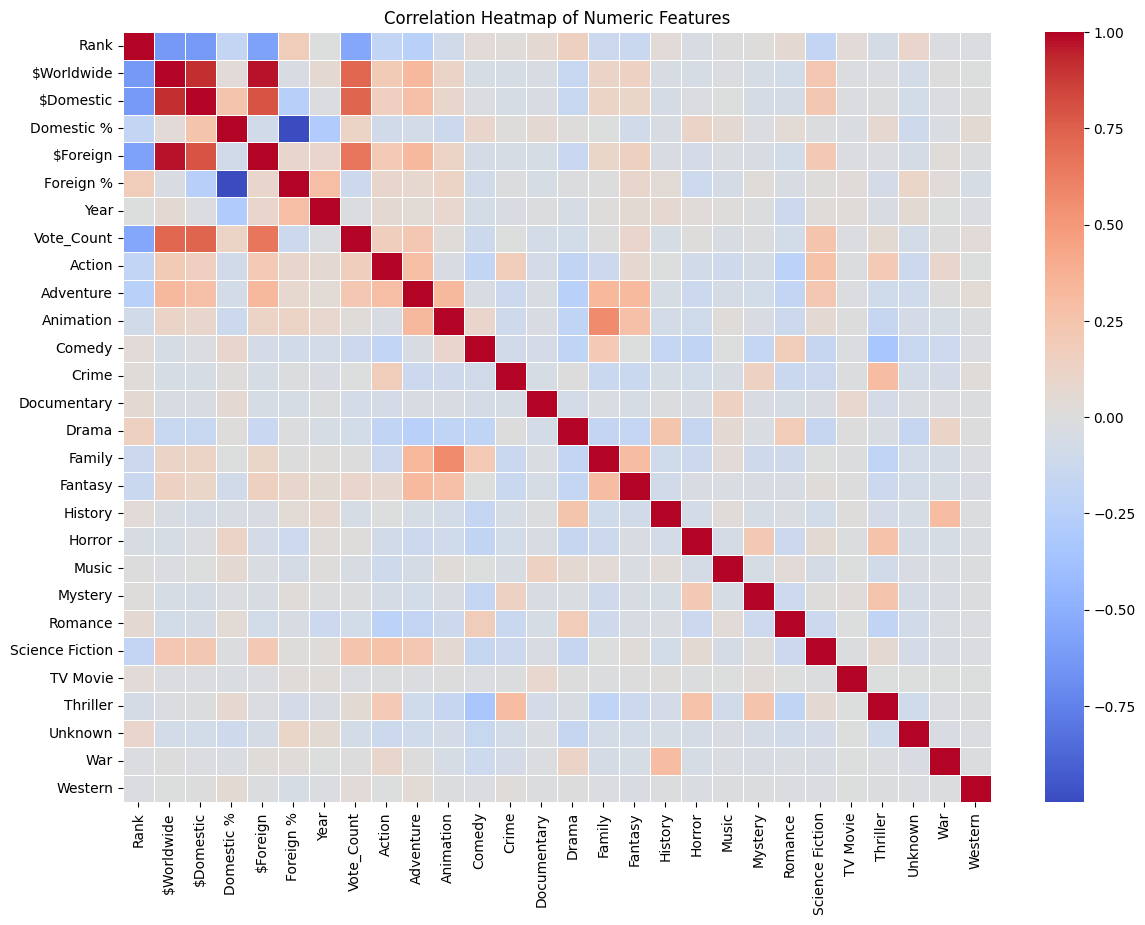

In [ ]:
# Select numeric columns for correlation analysis
df_numeric = df_cleaned.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = df_numeric.corr()

# Plot correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

<ipython-input-78-2e42e4eb0433>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.index, y=top_genres.values, palette="viridis")


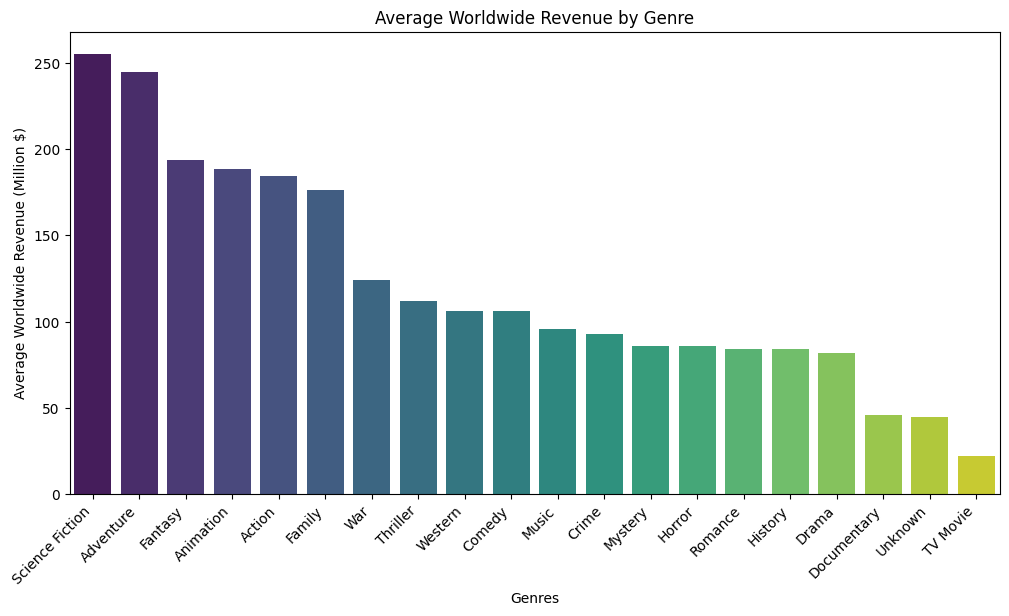

In [ ]:
# Compute average revenue per genre
genre_columns = genres_split.columns
genre_revenue = df_cleaned[genre_columns].multiply(df_cleaned["$Worldwide"], axis=0).sum() / df_cleaned[genre_columns].sum()

# Sort genres by revenue
top_genres = genre_revenue.sort_values(ascending=False)

# Plot revenue by genre
plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.index, y=top_genres.values, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Genres")
plt.ylabel("Average Worldwide Revenue (Million $)")
plt.title("Average Worldwide Revenue by Genre")
plt.show()


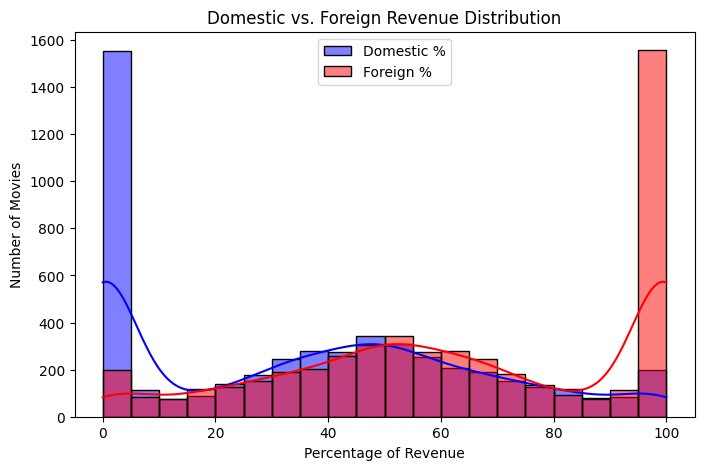

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned["Domestic %"], bins=20, kde=True, color="blue", label="Domestic %")
sns.histplot(df_cleaned["Foreign %"], bins=20, kde=True, color="red", label="Foreign %")
plt.xlabel("Percentage of Revenue")
plt.ylabel("Number of Movies")
plt.title("Domestic vs. Foreign Revenue Distribution")
plt.legend()
plt.show()

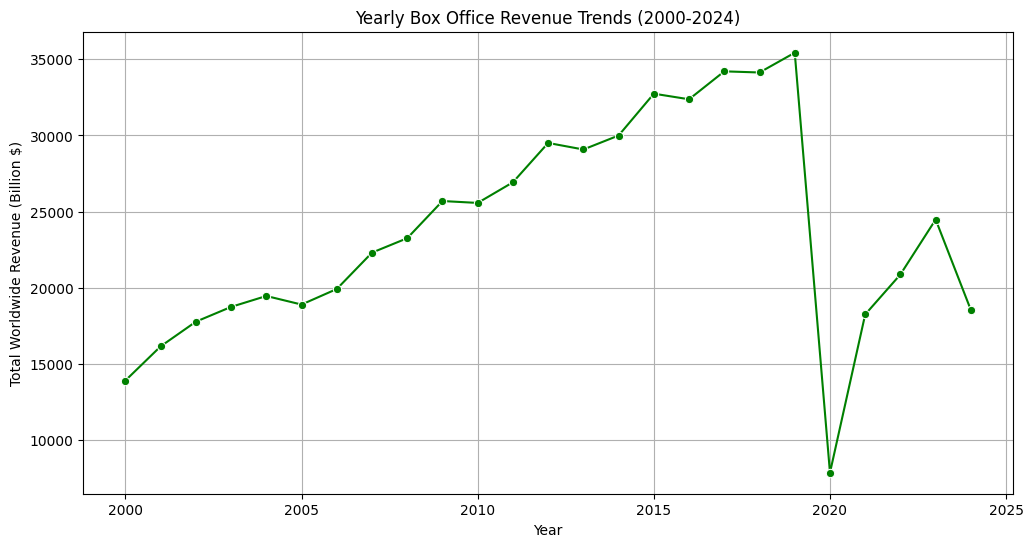

In [ ]:
yearly_revenue = df_cleaned.groupby("Year")["$Worldwide"].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_revenue.index, y=yearly_revenue.values, marker="o", color="green")
plt.xlabel("Year")
plt.ylabel("Total Worldwide Revenue (Billion $)")
plt.title("Yearly Box Office Revenue Trends (2000-2024)")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# One-hot encode "Release_Season"
df_encoded = pd.get_dummies(df_cleaned, columns=["Release_Season"], drop_first=True)

# Select features and target
season_columns = [col for col in df_encoded.columns if "Release_Season" in col]
features = ["Domestic %", "Foreign %", "Vote_Count"] + list(genres_split.columns) + season_columns
target = "$Worldwide"

X = df_encoded[features]
y = df_encoded[target]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display data shape
X_train.shape, X_test.shape

((4000, 27), (1000, 27))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

# Train models and evaluate performance
model_performance = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    model_performance[name] = {"R² Score": r2, "MAE": mae, "RMSE": rmse}

# Convert results to DataFrame
performance_df = pd.DataFrame(model_performance).T
performance_df


,R² Score,MAE,RMSE
Linear Regression,0.564055,70.761363,142.615809
Random Forest,0.570555,63.277912,141.548501
XGBoost,0.594104,64.428906,137.612802


In [ ]:
# Sample movie data
sample_movie = pd.DataFrame({
    "Domestic %": [40],
    "Foreign %": [60],
    "Vote_Count": [15000],
    "Action": [1], "Adventure": [1], "Animation": [0], "Comedy": [0],
    "Crime": [0], "Documentary": [0], "Drama": [0], "Family": [0],
    "Fantasy": [0], "History": [0], "Horror": [0], "Music": [0],
    "Mystery": [0], "Romance": [0], "Science Fiction": [0], "TV Movie": [0],
    "Thriller": [0], "Unknown": [0], "War": [0], "Western": [0],
    "Release_Season_Early 2010s": [0], "Release_Season_Early 2020s": [1],
    "Release_Season_Mid 2000s": [0], "Release_Season_Mid 2010s": [0]
})

sample_movie = sample_movie[X_train.columns]
predicted_revenue = models["XGBoost"].predict(sample_movie)[0]
predicted_revenue


1609.7522